## IN3050/IN4050 Mandatory Assignment 2, 2024: Supervised Learning
## Sameer Ahmed: sameera@uio.no

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, March 22, 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a regular Python script if you prefer.

#### Alternative 1
If you prefer not to use notebooks, you should deliver the code, your run results, and a PDF report where you answer all the questions and explain your work.

#### Alternative 2
If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs. (If you can't export: notebook -> latex -> pdf on your own machine, you may do this on the IFI linux machines.)

Here is a list of *absolutely necessary* (but not sufficient) conditions to get the assignment marked as passed:

- You must deliver your code (Python script or Jupyter notebook) you used to solve the assignment.
- The code used for making the output and plots must be included in the assignment. 
- You must include example runs that clearly shows how to run all implemented functions and methods.
- All the code (in notebook cells or python main-blocks) must run. If you have unfinished code that crashes, please comment it out and document what you think causes it to crash. 
- You must also deliver a pdf of the code, outputs, comments and plots as explained above.

Your report/notebook should contain your name and username.

Deliver one single compressed folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the assignment
The goal of this assignment is to get a better understanding of supervised learning with gradient descent. It will, in particular, consider the similarities and differences between linear classifiers and multi-layer feed forward neural networks (multi-layer perceptrons, MLP) and the differences and similarities between binary and multi-class classification. A significant part is dedicated to implementing and understanding the backpropagation algorithm. 

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use machine learning libraries like Scikit-Learn or PyTorch, because the point of this assignment is for you to implement things from scratch. You, however, are encouraged to use tools like NumPy and Pandas, which are not ML-specific.

The given precode uses NumPy. You are recommended to use NumPy since it results in more compact code, but feel free to use pure Python if you prefer. 

### Beware
This is a revised assignment compared to earlier years. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # This is only to generate a dataset

## Datasets

We start by making a synthetic dataset of 2000 instances and five classes, with 400 instances in each class. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html regarding how the data are generated.) We choose to use a synthetic dataset---and not a set of natural occuring data---because we are mostly interested in properties of the various learning algorithms, in particular the differences between linear classifiers and multi-layer neural networks together with the difference between binary and multi-class data. In addition, we would like a dataset with instances represented with only two numerical features, so that it is easy to visualize the data. It would be rather difficult (although not impossible) to find a real-world dataset of the same nature. Anyway, you surely can use the code in this assignment for training machine learning models on real-world datasets.

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by Scikit-Learn, but that will not be the case with real-world data) We should split the data so that we keep the alignment between X (features) and t (class labels), which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments. This is done by the `random_state` argument and the `rng = np.random.RandomState(2024)`.

In [346]:
# Generating the dataset
from sklearn.datasets import make_blobs
X, t_multi = make_blobs(n_samples=[400, 400, 400, 400, 400], centers=[[0,1],[4,2],[8,1],[2,0],[6,0]], 
                  n_features=2, random_state=2024, cluster_std=[1.0, 2.0, 1.0, 0.5, 0.5])

In [347]:
# Shuffling the dataset
indices = np.arange(X.shape[0])
rng = np.random.RandomState(2024)
rng.shuffle(indices)
indices[:10]

array([ 937, 1776,  868, 1282, 1396,  147,  601, 1193, 1789,  547])

In [348]:
# Splitting into train, dev and test
X_train = X[indices[:1000],:]
X_val = X[indices[1000:1500],:]
X_test = X[indices[1500:],:]
t_multi_train = t_multi[indices[:1000]]
t_multi_val = t_multi[indices[1000:1500]]
t_multi_test = t_multi[indices[1500:]]

Next, we will  make a second dataset with only two classes by merging the existing labels in (X,t), so that `0`, `1` and `2` become the new `0` and `3` and `4` become the new `1`. Let's call the new set (X, t2). This will be a binary set.
We now have two datasets:

- Binary set: `(X, t2)`
- Multi-class set: `(X, t_multi)`

In [349]:
t2_train = t_multi_train >= 3
t2_train = t2_train.astype('int')
t2_val = (t_multi_val >= 3).astype('int')
t2_test = (t_multi_test >= 3).astype('int')

We can plot the two traning sets.

Text(0.5, 1.0, 'Multi-class set')

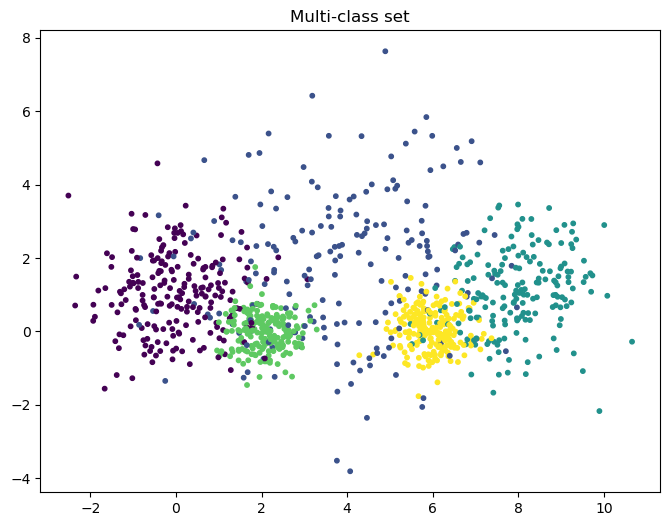

In [350]:
plt.figure(figsize=(8,6)) # You may adjust the size
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_multi_train, s=10.0)
plt.title("Multi-class set")

Text(0.5, 1.0, 'Binary set')

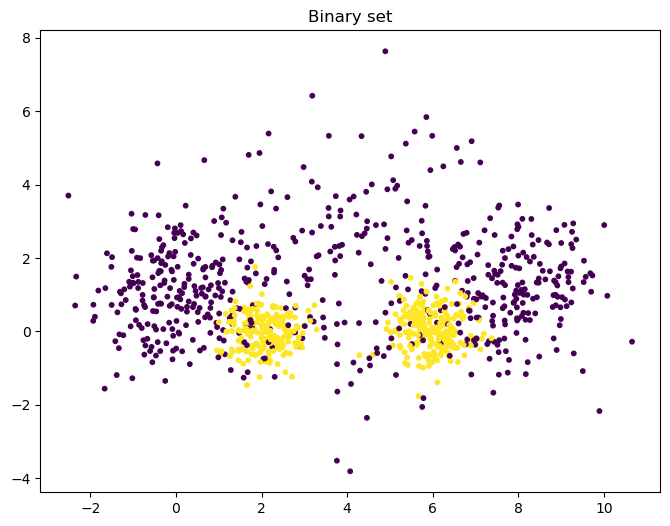

In [351]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t2_train, s=10.0)
plt.title("Binary set")

# Part 1: Linear classifiers
### Linear regression

We see that even the binary set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression with the Mean Squared Error (MSE) loss, although it is not the most widely used approach for classification tasks: but we are interested. You may make your own implementation from scratch or start with the solution to the weekly exercise set 7. 
We include it here with a little added flexibility.

In [352]:
def add_bias(X, bias):
    """X is a NxM matrix: N datapoints, M features
    bias is a bias term, -1 or 1, or any other scalar. Use 0 for no bias
    Return a Nx(M+1) matrix with added bias in position zero
    """
    N = X.shape[0]
    biases = np.ones((N, 1)) * bias # Make a N*1 matrix of biases
    # Concatenate the column of biases in front of the columns of X.
    return np.concatenate((biases, X), axis  = 1) 

In [353]:
class NumpyClassifier():
    """Common methods to all Numpy classifiers --- if any"""

In [354]:
class NumpyLinRegClass(NumpyClassifier):

    def __init__(self, bias=-1):
        self.bias=bias
    
    def fit(self, X_train, t_train, lr = 0.1, epochs=10):
        """X_train is a NxM matrix, N data points, M features
        t_train is avector of length N,
        the target class values for the training data
        lr is our learning rate
        """
        
        if self.bias:
            X_train = add_bias(X_train, self.bias)
            
        (N, M) = X_train.shape
        
        self.weights = weights = np.zeros(M)
        
        for epoch in range(epochs):
            # print("Epoch", epoch)
            weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)   
  
    
    def predict(self, X, threshold=0.5):
        """X is a KxM matrix for some K>=1
        predict the value for each point in X"""
        if self.bias:
            X = add_bias(X, self.bias)
        ys = X @ self.weights
        return ys > threshold

We can train and test a first classifier.

In [355]:
def accuracy_def(predicted, gold):
    return np.mean(predicted == gold)

In [356]:
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=3)
print("Accuracy on the validation set:", accuracy_def(cl.predict(X_val), t2_val))

Accuracy on the validation set: 0.58


The following is a small procedure which plots the data set together with the decision boundaries. 
You may modify the colors and the rest of the graphics as you like.
The procedure will also work for multi-class classifiers

In [357]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a prediction of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

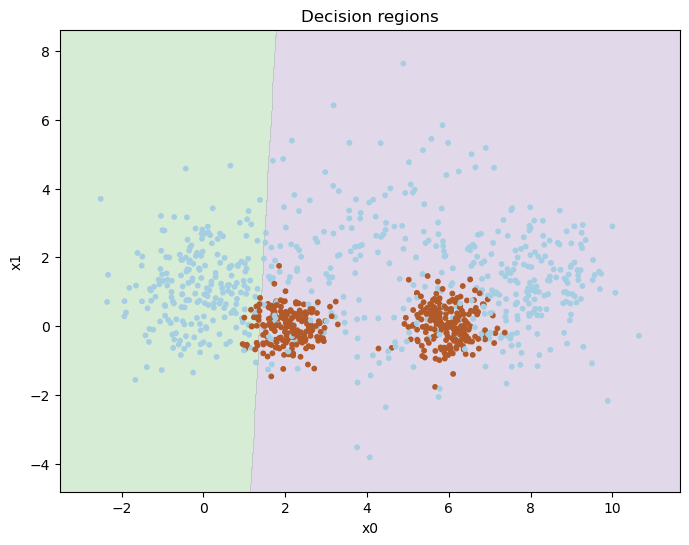

In [358]:
plot_decision_regions(X_train, t2_train, cl)

### Task: Tuning

The result is far from impressive. 
Remember that a classifier which always chooses the majority class will have an accuracy of 0.6 on this data set.

Your task is to try various settings for the two training hyper-parameters, learning rate and the number of epochs, to get the best accuracy on the validation set. 

Report how the accuracy varies with the hyper-parameter settings. It it not sufficient to give the final hyperparameters. You must also show how you found then and results for alternative values you tried aout.

When you are satisfied with the result, you may plot the decision boundaries, as above.

Best LR: 0.05, Best Epochs: 400, Best Accuracy: 0.76


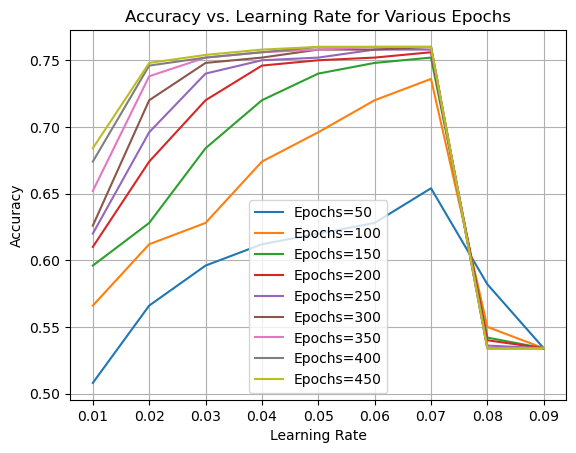

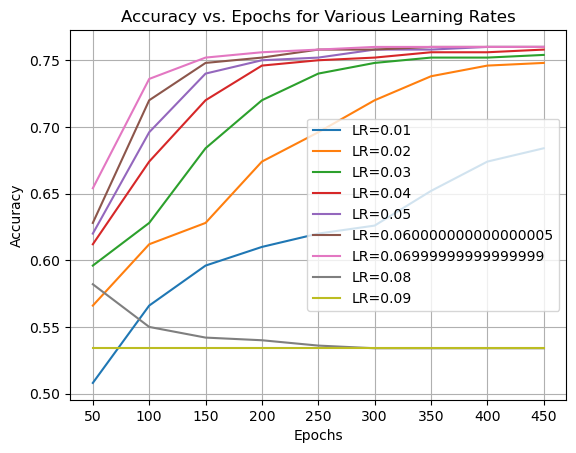

Accuracy on validation set:  0.76


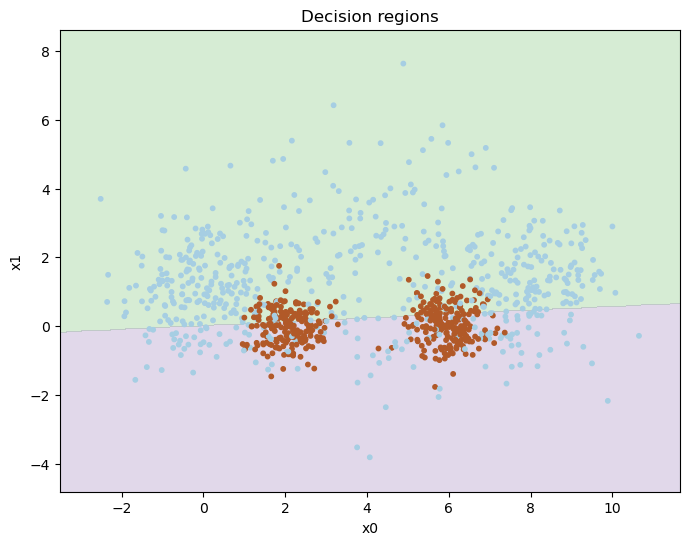

In [359]:


def tune_hyperparameters(X_train):

    results = {}
    learning_rates = np.arange(0.01,0.1, 0.01)
    epochs = np.arange(0,500, 50)
    

    for lr in learning_rates:
        for epoch in epochs:
            cl = NumpyLinRegClass()
            cl.fit(X_train, t2_train, lr, epoch)

            acc = accuracy_def(cl.predict(X_val), t2_val)
            results[(lr, epoch)] = acc
            #print(f"LR: {lr}, Epochs: {epoch}, Accuracy: {acc}")
    
    best_params = max(results, key=results.get)
    best_accuracy = results[best_params]
    print(f"Best LR: {best_params[0]}, Best Epochs: {best_params[1]}, Best Accuracy: {best_accuracy}")
    
    return best_params[0], best_params[1], best_accuracy, results

new= NumpyLinRegClass()
best_lr, best_epochs, best_acc, results = tune_hyperparameters(X_train)
best= new.fit(X_train, t2_train, best_lr, best_epochs)

learning_rates = np.arange(0.01, 0.1, 0.01)
epochs = np.arange(50, 500, 50)


for epoch in epochs:
    accuracies = [results.get((lr, epoch)) for lr in learning_rates]
    plt.plot(learning_rates, accuracies, label=f'Epochs={epoch}')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for Various Epochs')
plt.legend()
plt.grid(True)
plt.show()


for lr in learning_rates:
    accuracies = [results.get((lr, epoch)) for epoch in epochs]
    plt.plot(epochs, accuracies, label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for Various Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy on validation set: ",accuracy_def(new.predict(X_val),t2_val))


plot_decision_regions(X_train,t2_train, new)




### Question answer
As you can see from the graphs, the accuracy varies significantly depending on the learning rate and the number of epochs. The optimal parameters I found were LR = 0.05 and Epochs = 400, which resulted in an accuracy of 0.76.

I experimented with different values for the learning rate, ranging from 0.01 to 0.1, with a step size of 0.01. I did the same for epochs, ranging from 50 to 500, with a step size of 50.

### Task: Scaling

We have seen in the lectures that scaling the data may improve training speed and sometimes the performance. 

- Implement a scaler, at least the standard scaler (normalizer), but you can also try other techniques
- Scale the data
- Train the model on the scaled data
- Experiment with hyper-parameter settings and see whether you can speed  up  the training.
- Report final hyper-parameter settings and show how you found them.

In [360]:
def standard_scaler(X, means=None,stds=None):
    scaled_X = X.copy()
    #Use the means and stds from the traning set on val set
    if means is None and stds is None:
        means = np.mean(scaled_X, axis=0)
        stds = np.std(scaled_X, axis=0)
    
    scaled_X = (scaled_X - means) / stds
    
    return scaled_X, means, stds



X_train_scaled, means , stds= standard_scaler(X_train)
X_val_scaled, _, _ = standard_scaler(X_val, means, stds)
print(X_train_scaled)

best_lr, best_epoch, best_acc, result = tune_hyperparameters(X_train_scaled)
scaler= NumpyLinRegClass()
scaler.fit(X_train_scaled, t2_train, best_lr, best_epoch)
print("Test accuracy on scaled validation set: ",accuracy_def(scaler.predict(X_val_scaled),t2_val))



[[ 1.41584965  0.28408664]
 [ 1.26269064 -0.44510806]
 [ 1.69822404  0.75240349]
 ...
 [ 0.88829758 -0.02338279]
 [-0.49149938 -0.95121628]
 [-1.10028801  0.30868702]]
Best LR: 0.02, Best Epochs: 300, Best Accuracy: 0.724
Test accuracy on scaled validation set:  0.758


### Question answer

The optimal parameters for the scaled data are LR = 0.02 and Best Epochs = 300, which resulted in an accuracy of 0.758 on the validation set. I used the method from the previous task to find these parameters.

The accuracy achieved with the scaled data was slightly lower compared to the unscaled data (Accuracy 0.76), although it required 100 fewer epochs than the unscaled data.

## Logistic regression
a) You should now implement a logistic regression classifier similarly to the classifier based on linear regression.
You may use the code from the solution to weekly exercise set week07.

b) In addition to the method `predict()` which predicts a class for the data, include a method `predict_probability()` which predict the probability of the data belonging to the positive class.

c) So far, we have not calculated the loss explicitly in the code. Extend the code to calculate the loss on the training set for each epoch and to store the losses such that the losses can be inspected after training. The prefered loss for logistic regression is binary cross-entropy, but you can also try mean squared error. The most important is that your implementation of the loss corresponds to your implementation of the gradient descent.
Also, calculate and store accuracies after each epoch.

d) In addition, extend the `fit()` method with optional arguments for a validation set (X_val, t_val). If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch. 

e) The training runs for a number of epochs. We cannot know beforehand for how many epochs it is reasonable to run the training. One possibility is to run the training until the learning does not improve much. Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved with more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Also, add an attribute to the classifier which tells us after fitting how many epochs it was trained for.

f) Train classifiers with various learning rates, and with varying values for `tol` for finding the optimal values. Also consider the effect of scaling the data.

g) After a succesful training, for your best model, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see. Are the curves monotone? Is this as expected?

In [361]:
def logistic(x):
    return 1/(1+np.exp(-x))

Early stopping at epoch 31
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 225
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 115
Early stopping at epoch 29
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 79
Early stopping at epoch 27
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 287
Best Parameters: Lr: 0.05, Tol: 0.001, Best Accuracy: 0.758
Early stopping at epoch 146


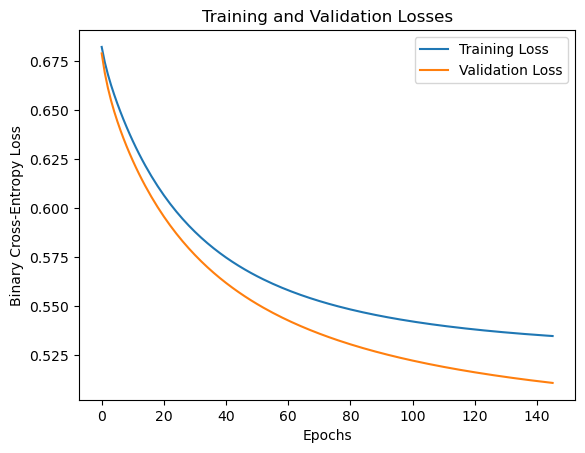

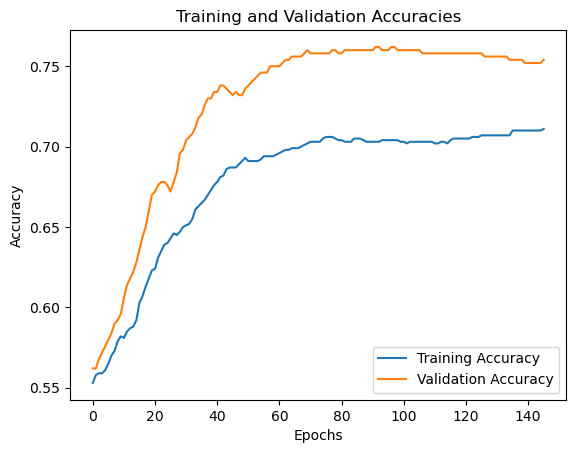

In [404]:

class NumpyLogReg(NumpyClassifier):

    def __init__(self, bias=-1):
            self.bias = bias
            self.weights = None
            self.losses = []
            self.accuracies = []
            self.val_losses = []
            self.val_accuracies = []
      
            
    def fit(self, X_train, t_train, eta=0.1, epochs=300, X_validate=None, t_validate=None, tol=0.001, n_epochs_no_update=5):
        if self.bias:
            X_train = add_bias(X_train, self.bias)
            if X_validate is not None:
                X_validate = add_bias(X_validate, self.bias)
        
        (N, m) = X_train.shape
        self.weights = np.zeros(m)
        last_loss = np.inf
        epochs_without_improvement = 0
        
        for epoch in range(epochs):
            #gradient update
            self.weights -= eta / N * X_train.T @ (self.forward(X_train) - t_train)
            
            #training loss and accuracy
            train_loss = self.bin_cel(X_train, t_train)
            train_accuracy = self.accuracy(X_train, t_train)
            self.losses.append(train_loss)
            self.accuracies.append(train_accuracy)
            
            #validation loss and accuracy
            if X_validate is not None and t_validate is not None:
                val_loss = self.bin_cel(X_validate, t_validate)
                self.val_losses.append(val_loss)
                self.val_accuracies.append(self.accuracy(X_validate, t_validate))
                loss_improvement = last_loss - val_loss
            else:
                loss_improvement =last_loss-train_loss
            
            #early stopping check
            if loss_improvement < tol:
                epochs_without_improvement += 1
            else:
                epochs_without_improvement = 0
                if X_validate is not None and t_validate is not None:
                    last_loss = val_loss
                else:
                    last_loss=train_loss
            
            if epochs_without_improvement >= n_epochs_no_update:
                print(f"Early stopping at epoch {epoch + 1}")
                break
            
    
    def forward(self, X):
        return logistic(X @ self.weights)
    
    def predict(self, x, threshold=0.5):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        z = add_bias(x,self.bias)
        return (self.forward(z) > threshold).astype('int')
    
    def predict_probability(self, X):
        X = add_bias(X, self.bias)
        return self.forward(X)
    
    def bin_cel (self,X,t):
        predicted = self.forward(X)
        return -np.mean(t * np.log(predicted) + (1 - t) * np.log(1 - predicted))
    
    def accuracy (self, X, t, threshold=0.5):
        predicted_probabilities = self.forward(X)
        predicted_classes = (predicted_probabilities > threshold).astype(int)
        return np.mean(predicted_classes == t)

learning_rates = [0.001, 0.01, 0.05, 0.1]
tol_rate = [0.001, 0.01, 0.05, 0.1, 0.00001]

best_accuracy = 0
best_lr=0
best_tol=0

for lr in learning_rates:
    for tol in tol_rate:
        # Initialize and train the model
        model = NumpyLogReg()
        model.fit(X_train, t2_train, epochs=300,eta=lr, tol=tol)
            
        # Evaluate on validation set
        predictions = model.predict(X_val)
        accuracy = np.mean(predictions == t2_val)
        #print(f"LR: {lr}, Tol: {tol}, Accuracy: {accuracy}")
            
        # Update best model if improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr=lr
            best_tol=tol

print(f"Best Parameters: Lr: {best_lr}, Tol: {best_tol}, Best Accuracy: {best_accuracy}")
    

log = NumpyLogReg()
log.fit(X_train,t2_train,eta=best_lr, X_validate=X_val, t_validate=t2_val,tol=best_tol)

plt.plot(log.losses, label='Training Loss')
plt.plot(log.val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.show()

plt.plot(log.accuracies, label='Training Accuracy')
plt.plot(log.val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### Question answer
The optimal parameters for the Logistic regression are LR = 0.05 and Toi = 0.001, which resulted in an accuracy of 0.778 on the validation set. 

The training and validation loss curves are both monotonically decreasing, which indicates the model is consistently learning from the data throughout the epochs. The training accuracy increases and tends to flat out, suggesting the model may be reaching its performance capacity on the training data. But we can see that both the loss and accuracy is better in the validation set.

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t_multi).

### "One-vs-rest" with logistic regression
We saw in the lectures how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one logistic regression classifier for each class. To predict the class of an item, we run all the binary classifiers and collect the probability score from each of them. We assign the class which ascribes the highest probability.

Build such a classifier. Train the resulting classifier on (X_train, t_multi_train), test it on (X_val, t_multi_val), tune the hyper-parameters and report the accuracy.

Also plot the decision boundaries for your best classifier similarly to the plots for the binary case.

Early stopping at epoch 191
Early stopping at epoch 63
Early stopping at epoch 279
Early stopping at epoch 148
Early stopping at epoch 62
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 25
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 198
Early stopping at epoch 90
Early stopping at epoch 109
Early stopping at epoch 46
Early stopping at epoch 22
Early stopping at epoch 10
Early stopping at epoch 33
Early stopping at epoch 18
Early stopping at epoch 15
Early stopping at epoch 11
Early stopping at epoch 6
Early stopping at epoch 13
Early stopping at epoch 6
Early stopping at epoch 10
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping at epoch 6
Early stopping 

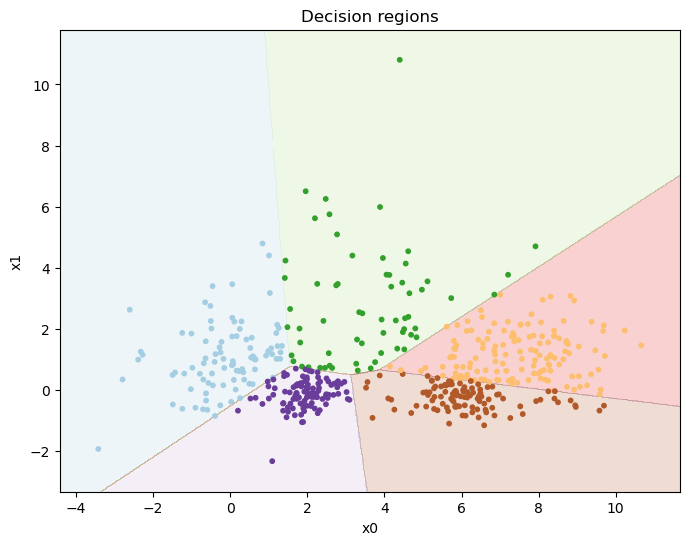

In [ ]:

class MultiClassLogReg:
    def __init__(self, bias=-1):
        self.bias = bias
        self.classifiers = [] 

    def fit(self, X_train, t_train, eta=0.1, epochs=10, tol=0.001, n_epochs_no_update=5):
        self.classes = np.unique(t_train) 
        for c in self.classes:
            # binary labels for current class vs rest
            binary_labels = np.where(t_train == c, 1, 0)
            # Initialize a NumpyLogReg classifier for the current class
            classifier = NumpyLogReg(self.bias)
            classifier.fit(X_train, binary_labels, eta, epochs, None, None, tol, n_epochs_no_update)
            self.classifiers.append(classifier)

    def predict(self, X):
        probs = np.array([clf.predict_probability(X) for clf in self.classifiers]).T
        return np.argmax(probs, axis=1)


learning_rates = [0.001, 0.01, 0.05, 0.1]
tol_rate = [0.001, 0.01, 0.05, 0.1, 0.00001]

best_accuracy = 0
best_lr=0
best_tol=0

for lr in learning_rates:
    for tol in tol_rate:
        # Initialize and train the model
        model = MultiClassLogReg()
        model.fit(X_train, t_multi_train, epochs=300,eta=lr, tol=tol)
            
        # Evaluate on validation set
        predictions = model.predict(X_val)
        accuracy = np.mean(predictions == t_multi_val)
            
        # Update best model if improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr=lr
            best_tol=tol

print(f"Best Parameters: Lr: {best_lr}, Tol: {best_tol}, Best Accuracy: {best_accuracy}")



mcl = MultiClassLogReg()
mcl.fit(X_train, t_multi_train, eta=best_lr, epochs=300,tol=best_tol)

# Predict on validation set
predictions = mcl.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = np.mean(predictions == t_multi_val)
print(f"Validation Accuracy: {accuracy_val}")


plot_decision_regions(X_val, predictions, clf=mcl)

### Question answer
The optimal parameters for the One vs rest are LR = 0.1 and Toi = 0.00001, which resulted in an accuracy of 0.796 on the validation set. 


### For IN4050 students: Multinomial logistic regression
The following part is only mandatory for IN4050 students. IN3050 students are also welcome to make it a try. Everybody has to do the part 2 on multi-layer neural networks. 

In the lectures, we contrasted the one-vs-rest approach with the multinomial logistic regression, also called softmax classifier. Implement also this classifier, tune the parameters, and compare the results to the one-vs-rest classifier. (Don't expect a large difference on a simple task like this.)

Remember that this classifier uses softmax in the forward phase. For loss, it uses categorical cross-entropy loss. The loss has a somewhat simpler form than in the binary case. To calculate the gradient is a little more complicated. The actual gradient and update rule is simple, however, as long as you have calculated the forward values correctly.

# Part 2: Multi-layer neural networks

## A first non-linear classifier

The following code is a simple implementation of a multi-layer perceptron or feed-forward neural network.
For now, it is quite restricted.
There is only one hidden layer.
It can only handle binary classification.
In addition, it uses a simple final layer similar to the linear regression classifier above.
One way to look at it is what happens when we add a hidden layer to the linear regression classifier.

The MLP class below misses the implementation of the `forward()` function. Your first task is to implement it. 

Remember that in the forward pass, we "feed" the input to the model, the model processes it and produces the output. The function should make use of the logistic activation function and bias.

In [ ]:
# First, we define the logistic function and its derivative:
def logistic(x):
    return 1/(1+np.exp(-x))

def logistic_diff(y):
    return y * (1 - y)

In [ ]:
class MLPBinaryLinRegClass(NumpyClassifier):
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self, bias=-1, dim_hidden = 6):
        """Intialize the hyperparameters"""
        self.bias = bias
        # Dimensionality of the hidden layer
        self.dim_hidden = dim_hidden
        
        self.activ = logistic
        
        self.activ_diff = logistic_diff
    
    def forward(self, X):
        hidden_input = X @ self.weights1 
    
        # activation Function on Hidden Layer
        hidden_output = self.activ(hidden_input) 
        
        # add Bias for Second Hidden Layer
        hidden_output_with_bias = add_bias(hidden_output, self.bias) 
        
        # hidden to Output Layer
        final_output = hidden_output_with_bias @ self.weights2 

        return hidden_output_with_bias, final_output
    
    def fit(self, X_train, t_train, lr=0.001, epochs = 100):
        """Intialize the weights. Train *epochs* many epochs.
        
        X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N of targets values for the training data, 
        where the values are 0 or 1.
        lr is the learning rate
        """
        self.lr = lr
        
        # Turn t_train into a column vector, a N*1 matrix:
        T_train = t_train.reshape(-1,1)
            
        dim_in = X_train.shape[1] 
        dim_out = T_train.shape[1]
        
        # Initialize the weights
        self.weights1 = (np.random.rand(
            dim_in + 1, 
            self.dim_hidden) * 2 - 1)/np.sqrt(dim_in)
        self.weights2 = (np.random.rand(
            self.dim_hidden+1, 
            dim_out) * 2 - 1)/np.sqrt(self.dim_hidden)
        X_train_bias = add_bias(X_train, self.bias)
        
        for e in range(epochs):
            # One epoch
            # The forward step:
            hidden_outs, outputs = self.forward(X_train_bias)
            # The delta term on the output node:
            out_deltas = (outputs - T_train)
            # The delta terms at the output of the hidden layer:
            hiddenout_diffs = out_deltas @ self.weights2.T
            # The deltas at the input to the hidden layer:
            hiddenact_deltas = (hiddenout_diffs[:, 1:] * 
                                self.activ_diff(hidden_outs[:, 1:]))  

            # Update the weights:
            self.weights2 -= self.lr * hidden_outs.T @ out_deltas
            self.weights1 -= self.lr * X_train_bias.T @ hiddenact_deltas 
            
    
    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        score= forw[:, 0]
        return (score > 0.5)

When implemented, this model can be used to make a non-linear classifier for the set `(X, t2)`. Experiment with settings for learning rate and epochs and see how good results you can get. 
Report results for various settings. Be prepared to train for a long time (but you can control it via the number of epochs and hidden size). 

Plot the training set together with the decision regions as in Part I.

LR: 0.001, Epochs: 100, Accuracy: 0.718
LR: 0.001, Epochs: 200, Accuracy: 0.862
LR: 0.001, Epochs: 300, Accuracy: 0.602
LR: 0.001, Epochs: 400, Accuracy: 0.85
LR: 0.001, Epochs: 500, Accuracy: 0.844
LR: 0.001, Epochs: 600, Accuracy: 0.802


/var/folders/6_/ks2hm_053qdg_55p6yrlt82h0000gn/T/ipykernel_3484/3220956541.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/6_/ks2hm_053qdg_55p6yrlt82h0000gn/T/ipykernel_3484/503750215.py:60: RuntimeWarning: overflow encountered in matmul
  hiddenout_diffs = out_deltas @ self.weights2.T
/var/folders/6_/ks2hm_053qdg_55p6yrlt82h0000gn/T/ipykernel_3484/503750215.py:62: RuntimeWarning: invalid value encountered in multiply
  hiddenact_deltas = (hiddenout_diffs[:, 1:] *


LR: 0.01, Epochs: 100, Accuracy: 0.604
LR: 0.01, Epochs: 200, Accuracy: 0.604
LR: 0.01, Epochs: 300, Accuracy: 0.604
LR: 0.01, Epochs: 400, Accuracy: 0.604
LR: 0.01, Epochs: 500, Accuracy: 0.604
LR: 0.01, Epochs: 600, Accuracy: 0.604
LR: 0.05, Epochs: 100, Accuracy: 0.604
LR: 0.05, Epochs: 200, Accuracy: 0.604
LR: 0.05, Epochs: 300, Accuracy: 0.604
LR: 0.05, Epochs: 400, Accuracy: 0.604
LR: 0.05, Epochs: 500, Accuracy: 0.604
LR: 0.05, Epochs: 600, Accuracy: 0.604
LR: 0.1, Epochs: 100, Accuracy: 0.604
LR: 0.1, Epochs: 200, Accuracy: 0.604
LR: 0.1, Epochs: 300, Accuracy: 0.604
LR: 0.1, Epochs: 400, Accuracy: 0.604
LR: 0.1, Epochs: 500, Accuracy: 0.604
LR: 0.1, Epochs: 600, Accuracy: 0.604
LR: 0.005, Epochs: 100, Accuracy: 0.604
LR: 0.005, Epochs: 200, Accuracy: 0.604
LR: 0.005, Epochs: 300, Accuracy: 0.604
LR: 0.005, Epochs: 400, Accuracy: 0.604
LR: 0.005, Epochs: 500, Accuracy: 0.604
LR: 0.005, Epochs: 600, Accuracy: 0.604
Best Parameters: Lr: 0.001, Epochs: 200, Best Accuracy: 0.862


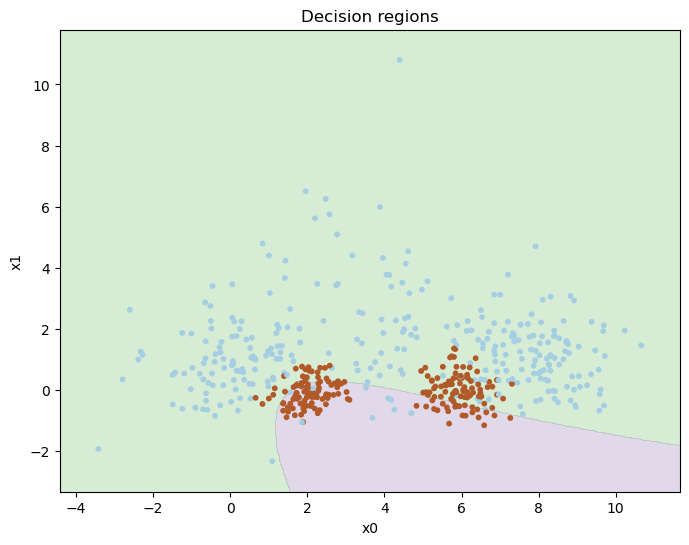

In [520]:

learning_rates = [0.001, 0.01, 0.05, 0.1,0.005]
epochs_options = [100, 200, 300, 400,500,600]

best_accuracy = 0
best_lr=0
best_epochs=0

for lr in learning_rates:
    for epochs in epochs_options:
        # Initialize and train the model
        model = MLPBinaryLinRegClass()
        model.fit(X_train, t2_train, lr=lr, epochs=epochs)
            
        # Evaluate on validation set
        predictions = model.predict(X_val)
        accuracy = np.mean(predictions == t2_val)
        print(f"LR: {lr}, Epochs: {epochs}, Accuracy: {accuracy}")
            
        # Update best model if improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr=lr
            best_epochs=epochs
                

final_model = MLPBinaryLinRegClass()
final_model.fit(X_train, t2_train, lr=best_lr, epochs=best_epochs)

plot_decision_regions(X_val, t2_val, clf=final_model)


print(f"Best Parameters: Lr: {best_lr}, Epochs: {best_epochs}, Best Accuracy: {best_accuracy}")


### Question answer
The optimal parameters are LR = 0.001 and Epoch size = 200, which resulted in an accuracy of 0.862 on the validation set.

# Improving the MLP classifier
You should now make changes to the classifier similarly to what you did with the logistic regression classifier in part 1.

a) In addition to the `predict()` method, which predicts a class for the data, include the `predict_probability()` method which predict the probability of the data belonging to the positive class. The training should be based on these values, as with logistic regression.

b) Calculate the loss and the accuracy after each epoch and store them for inspection after training.

c) Extend the `fit()` method with optional arguments for a validation set `(X_val, t_val)`. If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch.

d) Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved for more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Add an attribute to the classifier which tells us after fitting how many epochs it was trained on.

e) Tune the hyper-parameters: `lr`, `tol` and `dim-hidden` (size of the hidden layer).
Also, consider the effect of scaling the data.

f) After a succesful training with the best setting for the hyper-parameters, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see.

g) The MLP algorithm contains an element of non-determinism. Hence, train the classifier 10 times with the optimal hyper-parameters and report the mean and standard deviation of the accuracies over the 10 runs.

In [452]:

class MLPBinaryLinRegClass_improved(NumpyClassifier):
    def __init__(self, bias=-1, dim_hidden=6):
        self.bias = bias
        self.dim_hidden = dim_hidden
        self.activ = logistic
        self.activ_diff = logistic_diff
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def forward(self, X):
        hidden_input = X @ self.weights1
        hidden_output = self.activ(hidden_input)
        hidden_output_with_bias = add_bias(hidden_output, self.bias)
        final_output = hidden_output_with_bias @ self.weights2
        return hidden_output_with_bias, final_output
    
    def mse(self, X, t):
        return np.mean((X - t)**2)
    
    def accuracy(self, predictions, targets):
        return np.mean(predictions == targets)
    
    def fit(self, X_train, t_train, lr=0.001, epochs=100, X_validate=None, t_validate=None, tol=1e-5, n_epochs_no_update=10):
        T_train = t_train.reshape(-1, 1)
        dim_in = X_train.shape[1]
        self.weights1 = (np.random.rand(dim_in + 1, self.dim_hidden) * 2 - 1) / np.sqrt(dim_in)
        self.weights2 = (np.random.rand(self.dim_hidden + 1, 1) * 2 - 1) / np.sqrt(self.dim_hidden)

        X_train_bias = add_bias(X_train, self.bias)
        if X_validate is not None:
            X_validate_bias = add_bias(X_validate, self.bias)

        best_loss = np.inf
        no_improvement_count = 0
        epoch=-1
        for epoch in range(epochs):
            # Forward pass
            hidden_outputs, final_outputs = self.forward(X_train_bias)
            
            # Compute loss mse for training data
            loss = self.mse(final_outputs, T_train)
            self.train_losses.append(loss)
            
            # Calculate accuracy for training data
            train_acc = self.accuracy((final_outputs > 0.5).astype(int), t_train)
            self.train_accuracies.append(train_acc)
            
            output_errors = final_outputs - T_train
            hidden_errors = output_errors.dot(self.weights2.T) * self.activ_diff(hidden_outputs)
            
            # Update weights for the second layer
            self.weights2 -= lr * hidden_outputs.T.dot(output_errors)
            # Update weights for the first layer
            self.weights1 -= lr * X_train_bias.T.dot(hidden_errors[:, :-1])  # Exclude bias
            
            # Validation if validation set is provided
            if X_validate is not None and t_validate is not None:
                val_hidden_outputs, val_final_outputs = self.forward(X_validate_bias)
                val_loss = self.mse(val_final_outputs, t_validate.reshape(-1, 1))
                self.val_losses.append(val_loss)
                
                val_acc = self.accuracy((val_final_outputs > 0.5).astype(int), t_validate)
                self.val_accuracies.append(val_acc)
                
                # Check for improvement using validation loss
                if best_loss - val_loss > tol:
                    best_loss = val_loss
                    no_improvement_count = 0
                else:
                    no_improvement_count += 1
            else:
                # Check for improvement using training loss if no validation set is provided
                if best_loss - loss > tol:
                    best_loss = loss
                    no_improvement_count = 0
                else:
                    no_improvement_count += 1
            
            # Early stopping condition
            if no_improvement_count >= n_epochs_no_update:
                print(f"Early stopping triggered after {epoch + 1} epochs.")
                break
        
        

    
    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        score= forw[:, 0]
        return (score > 0.5)
    
    def predict_probability(self, X):
        X = add_bias(X, self.bias)
        _, outputs = self.forward(X)
        return outputs[:, 0]
    
    




Early stopping triggered after 11 epochs.
Early stopping triggered after 38 epochs.
Early stopping triggered after 15 epochs.
Early stopping triggered after 14 epochs.
Early stopping triggered after 11 epochs.


/var/folders/6_/ks2hm_053qdg_55p6yrlt82h0000gn/T/ipykernel_3484/3220956541.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Early stopping triggered after 28 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 20 epochs.
Early stopping triggered after 24 epochs.
Early stopping triggered after 21 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 12 epochs.
Early stopping triggered after 28 epochs.
Early stopping triggered after 20 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 27 epochs.
Early stopping triggered after 99 epochs.
Early stopping triggered after 30 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 epochs.
Early stopping triggered after 11 

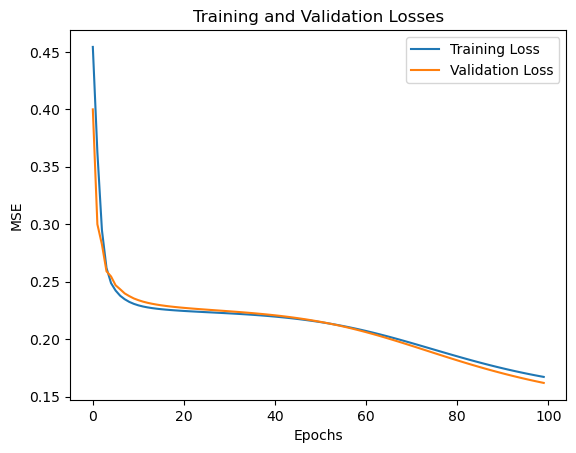

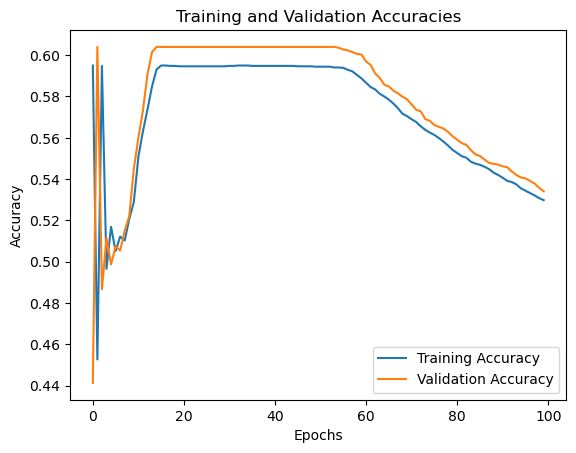

In [454]:

hidden_sizes=[6,7,8,9,10]
learning_rates = [0.001, 0.01, 0.05, 0.015, 0.005, 0.0005]
tol_rate = [0.001, 0.01, 0.05, 0.1, 0.00001,0.000001]

best_accuracy = 0
best_lr = 0
best_dim = 0
best_tol = 0

for lr in learning_rates:
     for dim_hidden in hidden_sizes:
          for tol in tol_rate: 
                model = MLPBinaryLinRegClass_improved(dim_hidden=dim_hidden)
                model.fit(X_train, t2_train, lr=lr, tol=tol) 
                predictions = model.predict(X_val)
                accuracy = np.mean(predictions == t2_val)
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_lr = lr
                    best_dim = dim_hidden
                    best_tol = tol 

#Train final model with best settings
final_model = MLPBinaryLinRegClass_improved(dim_hidden=best_dim)  
final_model.fit(X_train, t2_train, lr=best_lr, tol=best_tol,X_validate=X_val,t_validate=t2_val) 

print(f"Best Parameters: Lr: {best_lr}, Dim: {best_dim}, Tol: {best_tol}, Best Accuracy: {best_accuracy}")




plt.plot(final_model.train_losses, label='Training Loss')
plt.plot(final_model.val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(final_model.train_accuracies, label='Training Accuracy')
plt.plot(final_model.val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [510]:
accuracies = []

for run in range(10):
    model = MLPBinaryLinRegClass_improved(bias=-1, dim_hidden=best_dim)
    model.fit(X_train, t2_train, lr=best_lr, tol=best_tol)
    predictions = model.predict(X_val)
    acc = np.mean(predictions == t2_val)
    accuracies.append(acc)

# Calculate mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean accuracy over 10 runs: {mean_accuracy}")
print(f"Standard deviation of accuracies over 10 runs: {std_accuracy}")

Early stopping triggered after 91 epochs.
Early stopping triggered after 36 epochs.
Early stopping triggered after 95 epochs.
Early stopping triggered after 42 epochs.
Mean accuracy over 10 runs: 0.7954
Standard deviation of accuracies over 10 runs: 0.07324506809335356


### Question answer
The optimal parameters are LR = 0.0005 ,Dim = 8 and Tol = 0.000001, which resulted in an accuracy of 0.856 on the validation set.

The graph for loss looks quite similar to the graph in logistic regression, but that was more curved. But it decreases sharply and then levels off, suggesting that the model is learning from the data.

The graph for accuracy is very fluctuating at the start, then it starts to increase before dropping. 


The mean accuracy over 10 runs with optimal hyper-parameters is approximately 0.79, indicating consistent performance across runs. The standard deviation of the accuracies is about 0.07, which suggests there is some variance in the model.



## For IN4050-students: Multi-class neural network

The following part is only mandatory for IN4050 students. IN3050 students are also welcome to make it a try. This is the most fun part of the set :) )

The goal is to use a feed-forward neural network for non-linear multi-class classfication and apply it to the set `(X, t_multi)`.

Modify the network to become a multi-class classifier. As a sanity check of your implementation, you may apply it to `(X, t_2)` and see whether you get similar results as above.

Train the resulting classifier on `(X_train, t_multi_train)`, test it on `(X_val, t_multi_val)`, tune the hyper-parameters and report the accuracy.

Plot the decision boundaries for your best classifier.

# Part III: Final testing
We can now perform a final testing on the held-out test set we created in the beginning.

## Binary task (X, t2)
Consider the linear regression classifier, the logistic regression classifier and the multi-layer network with the best settings you found. Train each of them on the training set and evaluate on the held-out test set, but also on the validation set and the training set. Report the performance in a 3 by 3 table.

Comment on what you see. How do the three different algorithms compare? Also, compare the results between the different dataset splits. In cases like these, one might expect slightly inferior results on the held-out test data compared to the validation and training data. Is this the case? 

Also report precision and recall for class 1.

In [517]:
linear = NumpyLinRegClass()
linear.fit(X_train, t2_train,0.05,400)

acc_X_train = accuracy_def(linear.predict(X_train), t2_train)
acc_X_val = accuracy_def(linear.predict(X_val), t2_val)
acc_X_test = accuracy_def(linear.predict(X_test), t2_test)


log = NumpyLogReg()
log.fit(X_train, t2_train, 0.05, tol=0.0001, X_validate=X_val, t_validate=t2_val)

logistic_X_train = accuracy_def(log.predict(X_train), t2_train)
logistic_X_val = accuracy_def(log.predict(X_val), t2_val)
logistic_X_test = accuracy_def(log.predict(X_test), t2_test)


Multi = MLPBinaryLinRegClass_improved(dim_hidden=9)
Multi.fit(X_train,t2_train,lr=0.001,tol=1e-06,X_validate=X_val, t_validate=t2_val)
Multi_X_train = accuracy_def(Multi.predict(X_train), t2_train)
Multi_X_val = accuracy_def(Multi.predict(X_val), t2_val)
Multi_X_test = accuracy_def(Multi.predict(X_test), t2_test)


print("         Training ⏐ Validation ⏐ Testing")
print(f'linear:     {acc_X_train} ⏐   {acc_X_val}     ⏐ {acc_X_test} ')
print(f'logistic:   {logistic_X_train} ⏐   {logistic_X_val}    ⏐ {logistic_X_test} ')
print(f'Multi:      {Multi_X_train} ⏐   {Multi_X_val}    ⏐ {Multi_X_test} ')


def calculate_precision_recall(predictions, actual_labels, positive_class=1):
    true_positives = sum((predictions == positive_class) & (actual_labels == positive_class))
    false_positives = sum((predictions == positive_class) & (actual_labels != positive_class))
    false_negatives = sum((predictions != positive_class) & (actual_labels == positive_class))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    return precision, recall


precision_linear, recall_linear = calculate_precision_recall(linear.predict(X_test), t2_test)
precision_logistic, recall_logistic = calculate_precision_recall(log.predict(X_test), t2_test)
precision_multi, recall_multi = calculate_precision_recall(Multi.predict(X_test), t2_test)

print()

print("Linear Precision:", precision_linear, "Linear Recall:", recall_linear)
print("Logistic Precision:", precision_logistic, "Logistic Recall:", recall_logistic)
print("Multi Precision:", precision_multi, "Multi Recall:", recall_multi)


/var/folders/6_/ks2hm_053qdg_55p6yrlt82h0000gn/T/ipykernel_3484/3220956541.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


         Training ⏐ Validation ⏐ Testing
linear:     0.722 ⏐   0.76     ⏐ 0.72 
logistic:   0.719 ⏐   0.754    ⏐ 0.722 
Multi:      0.755 ⏐   0.792    ⏐ 0.75 

Linear Precision: 0.6492146596858639 Linear Recall: 0.6294416243654822
Logistic Precision: 0.6593406593406593 Logistic Recall: 0.6091370558375635
MLP Precision: 0.6565217391304348 MLP Recall: 0.766497461928934


### Question answer
All three classifiers show slightly better performance on the validation set compared to the training set. The multi-layer network outperforms the linear and logistic regression models, which is expected. The slight drop in performance on the held-out test set across all models is also expected, as this data has not been seen during the training phase.

From the results of precision and recall, we can see the MLP model shows a higher recall indicating a better ability to identify all relevant instances of class 1.

## For IN4050-students: Multi-class task (X, t_multi)

The following part is only mandatory for IN4050-students. IN3050-students are also welcome to give it a try though.

Compare the three multi-class classifiers, the one-vs-rest and the multinomial logistic regression from part one and the multi-class neural network from part two. Evaluate on test, validation and training set as above.

Comment on the results.

Good luck!